In [2]:
import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy import stats
import dython as dy # for nominal categorical data
from dython.nominal import associations 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

Read data

TODO: SYnc to GitHub

In [3]:
df_raw = pd.read_excel("Electric Taxis in South Africa(1-5000).xlsx")
df_raw = df_raw.append(pd.read_excel('Electric Taxis in South Africa(5001-5703).xlsx'))
df = df_raw.copy()
df.drop(df.columns[0:7], axis = 1, inplace = True)
df


/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_85200/1455652280.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_raw = df_raw.append(pd.read_excel('Electric Taxis in South Africa(5001-5703).xlsx'))


,In which province or country do you live?,Do you live in a city/urban or rural environment?,In which area are you living in now?,What is your home language,How old are you?,What is your gender?,What is the highest level of schooling have you succesfully completed or passed?,Have you completed ANY tertiary education?,What education have you received after school?,What is the highest level of tertiary education you have succesfully completed?,...,How concernd are you about climate change?,The taxi industry should reduce its environmental impact,Petrol and diesel taxis are an environmental problem,Electric taxis will help lessen the harmful environmental impact caused by the taxi industry,Government should focus on switching to electric vehicles,You describe yourself as someone who often takes risks,You describe yourself as someone who has a lot of trust in other people and institutions in general,You describe yourself as someone who generally trusts new technologies,"This survey is not available in your region yet. If you wish to be contacted when it is, please leave your email address below. Otherwise, you can close this survey.","Thank you for completing the survey. Please share this survey with other minibus taxi owners, drivers, and users: https://bit.ly/etaxisurvey"
0,Western Cape,City / Urban,Nyanga,Xhosa,45 - 54,Male,Grade 12 (Std. 10 / Matric / Senior Certificat...,No,NaN,NaN,...,10.0,Agree,Neutral,Neutral,Neutral,Agree,Agree,Agree,NaN,NaN
1,Western Cape,City / Urban,Mitchell's Plain,Zulu,35 - 44,Male,Grade 12 (Std. 10 / Matric / Senior Certificat...,No,NaN,NaN,...,9.0,Agree,Agree,Agree,Agree,Neutral,Neutral,Agree,NaN,NaN
2,Western Cape,City / Urban,Cape Town,English,35 - 44,Male,Grade 12 (Std. 10 / Matric / Senior Certificat...,No,NaN,NaN,...,1.0,Strongly agree,Strongly disagree,Neutral,Neutral,Neutral,Neutral,Neutral,NaN,NaN
3,Western Cape,City / Urban,Eerste River,English,35 - 44,Male,Grade 11 (Std. 9 / Form 4),No,NaN,NaN,...,5.0,Neutral,Agree,Agree,Agree,Agree,Neutral,Agree,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,Western Cape,City / Urban,Mfuleni,Xhosa,45 - 54,Male,Grade 11 (Std. 9 / Form 4),No,NaN,NaN,...,1.0,Neutral,Neutral,Neutral,Neutral,Disagree,Disagree,Neutral,NaN,NaN
699,Western Cape,City / Urban,Khayelitsha,English,25 - 34,Male,Grade 10 (Std. 8 / Form 3),No,NaN,NaN,...,1.0,Neutral,Neutral,Neutral,Neutral,Agree,Disagree,Neutral,NaN,NaN
700,Western Cape,City / Urban,Mfuleni,Xhosa,35 - 44,Male,Grade 10 (Std. 8 / Form 3),No,NaN,NaN,...,1.0,Neutral,Neutral,Neutral,Strongly disagree,Disagree,Disagree,Disagree,NaN,NaN
701,Western Cape,City / Urban,Belhar,Afrikaans,35 - 44,Male,Grade 11 (Std. 9 / Form 4),No,NaN,NaN,...,1.0,Neutral,Neutral,Neutral,Strongly disagree,Agree,Agree,Neutral,NaN,NaN


## <font color = 'orange'>Table of contents <font>

In [4]:
demographics = df.columns[0:6]
education = df.columns[6:10]
driver_owner_user = df['Please select the option that applies to you:'] # Question 10 
driver_questions=  df.columns[11:22]
owner_questions = df.columns[22:35]
owner_driver_questions = df.columns[35:47]

# Demographics

In [86]:
demographics = df.columns[0:6]
province_or_country = df[demographics[0]]
city_or_rural = df[demographics[1]]
which_area_now = df[demographics[2]]
language = df[demographics[3]]
age = df[demographics[4]]
gender = df[demographics[5]]


In [94]:
pd.DataFrame(age.value_counts())

,How old are you?
35 - 44,2392
45 - 54,1423
25 - 34,1132
55 - 65,216
18 - 24,118
65+,24


# Education

In [ ]:
education = df.columns[6:10]
highest_lvl_schooling = df[education[0]]
any_tertiary = df[education[1]]
any_education_after_school = df[education[2]]
highest_lvl_tertiary = df[education[3]]

Age vs length vs appetite for take-up

## Driver/Owner/User

In [33]:
driver_owner_user = df['Please select the option that applies to you:']

## Driver 

In [48]:
driver_questions=  df.columns[11:22]
driver_how_long_driving = df[driver_questions[0]]
driver_how_many_days_per_week_driving = df[driver_questions[1]]
driver_what_days_drive = df[driver_questions[2]]
driver_hours_drive_per_weekday = df[driver_questions[3]]
driver_km_per_weekday = df[driver_questions[4]]
driver_hours_drive_per_weekend = df[driver_questions[5]]
driver_income_per_day = df[driver_questions[6]]
driver_knows_what_e_taxi_is = df[driver_questions[7]]
driver_e_taxi_benefit_vs_ICE = df[driver_questions[8]]
driver_e_taxi_risks_vs_ICE = df[driver_questions[9]]
driver__taxi_better_than_ICE = df[driver_questions[10]]

In [56]:
def extract_responses(column):
    all_responses = []
    for response in column:
        if isinstance(response, str):
            split_responses = response.split(';')
            all_responses.extend([r.strip() for r in split_responses])
    unique_responses = list(set(all_responses))
    return unique_responses
#extract_responses(driver_e_taxi_benefit_vs_ICE)
driver_e_taxi_benefit_vs_ICE.explode().str.strip().value_counts()


Don't know;                                                                                                                                                                                                                   1757
None of the above;                                                                                                                                                                                                             652
Less exhaust gasses (less emissions and pollution);                                                                                                                                                                            281
Safer;                                                                                                                                                                                                                         204
Less expensive to operate;                                                                  

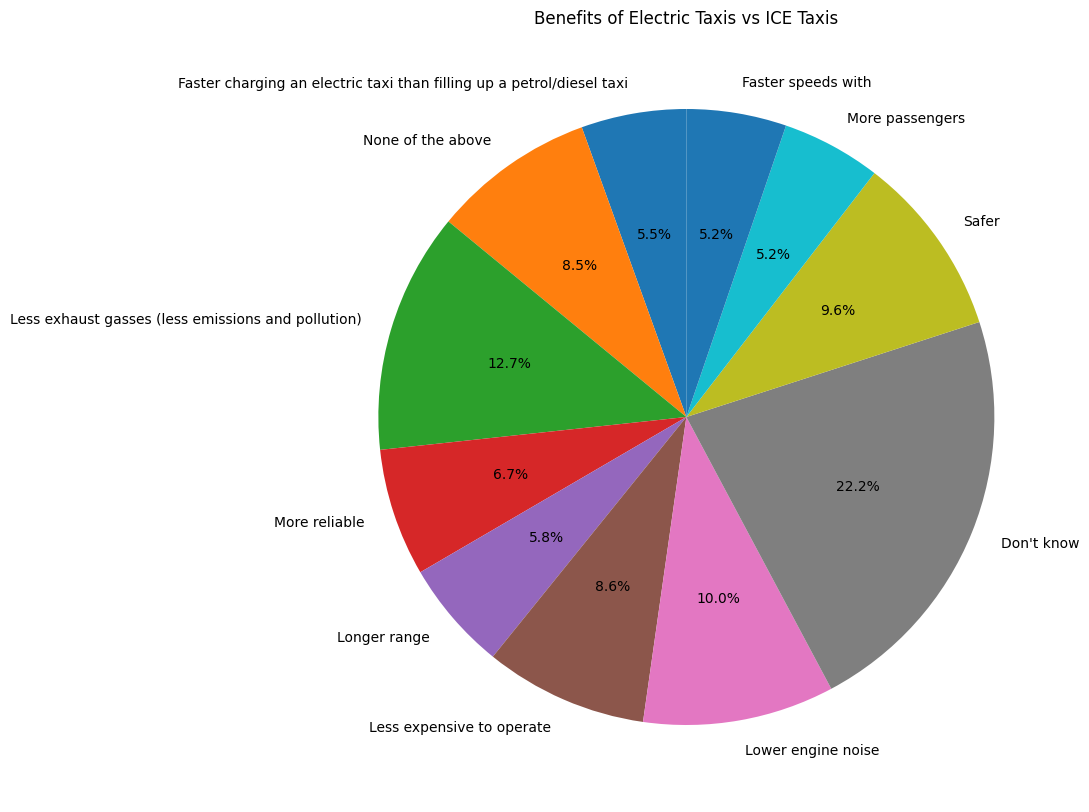

In [85]:
def extract_responses_value_counts(column):
    all_responses = []
    for response in column:
        if isinstance(response, str):
            split_responses = response.split(';')
            all_responses.extend([r.strip() for r in split_responses])
    unique_responses = list(set(all_responses))
    unique_responses = [r for r in unique_responses if r != '']
    counts = {response: all_responses.count(response) for response in unique_responses}
    return counts
pd.DataFrame.from_dict(extract_responses_value_counts(driver_e_taxi_benefit_vs_ICE), orient = 'index', columns = ['Count']).plot(kind = 'pie', y = 'Count', figsize = (10,10), autopct='%1.1f%%', startangle=90, legend = False, title = 'Benefits of Electric Taxis vs ICE Taxis')
plt.ylabel('')
plt.savefig('figures/drivers_benefits_of_electric_taxis_vs_ICE_taxis_distribution.png')
plt.show()


## Owner

In [43]:
owner_questions = df.columns[22:35]
owner_num_taxis = df[owner_questions[0]]
owner_how_long_owned_taxi = df[owner_questions[1]]
owner_petrol_or_diesel = df[owner_questions[2]]
owner_how_old_oldest_vehicle = df[owner_questions[3]]
owner_how_old_average_vehicle = df[owner_questions[4]]
owner_km_per_day = df[owner_questions[5]]
owner_income_per_week = df[owner_questions[6]]
owner_e_taxi_benefit_vs_ICE = df[owner_questions[7]]
owner_e_taxi_risks_vs_ICE = df[owner_questions[8]]
owner_e_taxi_better_than_ICE = df[owner_questions[9]]
owner_which_costs_more_to_run_ICE_or_etaxi = df[owner_questions[10]]
owner_which_costs_more_to_buy_ICE_or_etaxi = df[owner_questions[11]]
owner_which_costs_more_to_service_ICE_or_etaxi = df[owner_questions[12]]

# Owner + Driver

In [42]:
owner_driver_questions = df.columns[35:55]
owner_driver_num_taxis = df[owner_driver_questions[0]]
owner_driver_how_long_owned_taxi = df[owner_driver_questions[1]]
owner_driver_petrol_or_diesel = df[owner_driver_questions[2]]
owner_driver_how_old_oldest_vehicle = df[owner_driver_questions[3]]
owner_driver_how_old_average_vehicle = df[owner_driver_questions[4]]
owner_driver_how_far_per_day = df[owner_driver_questions[5]]
owner_driver_how_long_driven_taxi = df[owner_driver_questions[6]]
owner_driver_number_days_per_week = df[owner_driver_questions[7]]
owner_driver_what_days_drive = df[owner_driver_questions[8]]
owner_driver_hours_drive_per_weekday = df[owner_driver_questions[9]]
owner_driver_km_per_weekday_belief = df[owner_driver_questions[10]]
owner_driver_hours_drive_per_weekend = df[owner_driver_questions[11]]
owner_driver_income_per_week = df[owner_driver_questions[12]]
owner_driver_e_taxi_benefit_vs_ICE = df[owner_driver_questions[13]]
owner_driver_e_taxi_risks_vs_ICE = df[owner_driver_questions[14]]
owner_driver_e_taxi_better_than_ICE = df[owner_driver_questions[15]]
owner_driver_e_taxi_will_be_better_than_ICE = df[owner_driver_questions[16]]
owner_driver_which_costs_more_to_run_ICE_or_etaxi = df[owner_driver_questions[17]]
owner_driver_which_costs_more_to_buy_ICE_or_etaxi = df[owner_driver_questions[18]]
owner_driver_which_costs_more_to_service_ICE_or_etaxi = df[owner_driver_questions[19]]

## User

In [29]:
user_questions = df.columns[70:81]
user_how_long = user_questions[0]
user_how_many_days_per_week = user_questions[1]
user_what_days = user_questions[2]
user_how_far_normal_trip = user_questions[3]
user_avg_trip_cost = user_questions[4]
user_ICE_taxis_too_expensive = user_questions[5]
user_knows_what_e_taxi_is = user_questions[6]
owner_driver_e_taxi_benefit = user_questions[7]
owner_driver_e_taxi_risks = user_questions[8]
owner_environmental_conscience = user_questions[9]
user_price_vs_time_prefs = user_questions[10]

# Perceptions of Petrol and Diesel Taxis

In [41]:
perceptions_of_ICE_taxi = df.columns[55:60]
ICE_taxi_safe = df[perceptions_of_ICE_taxi[0]]
ICE_taxi_reliable = df[perceptions_of_ICE_taxi[1]]
ICE_taxi_fuel_expensive = df[perceptions_of_ICE_taxi[2]]
ICE_taxi_purchase_expensive = df[perceptions_of_ICE_taxi[3]]
ICE_taxi_service_expensive = df[perceptions_of_ICE_taxi[4]]

# Perception of EV

In [35]:
perceptions_of_EV_taxi = df.columns[60:70]
EV_taxi_range = df[perceptions_of_EV_taxi[0]]
EV_taxi_charge_time = df[perceptions_of_EV_taxi[1]]
EV_taxi_purchase_decision = df[perceptions_of_EV_taxi[2]]
EV_taxi_purchase_price_threshold = df[perceptions_of_EV_taxi[3]]
EV_taxi_should_happen = df[perceptions_of_EV_taxi[4]]
EV_taxi_worried_about_stations = df[perceptions_of_EV_taxi[5]]
EV_taxi_affected_by_loadshedding = df[perceptions_of_EV_taxi[6]]
EV_taxi_charging_expensive = df[perceptions_of_EV_taxi[7]]
EV_taxi_purchase_expensive = df[perceptions_of_EV_taxi[8]]
EV_taxi_service_expensive = df[perceptions_of_EV_taxi[9]]

In [46]:
EV_taxi_range.value_counts()
EV_taxi_charge_time.value_counts()

2 - 5hours             1814
More than 5hours       1455
1 - 2hours              909
30minutes - 1hour       566
20 - 30minutes          300
10 - 20minutes          128
Less than 10minutes      40
Name: How long do you think an electric taxi will take to fully recharge from an empty battery?, dtype: int64

# Other - need for ev taxi, climate change, and personal characteristics

In [37]:
need_for_e_taxi = df.columns[81:84]
possible_to_buy_ev = df[need_for_e_taxi[0]]
no_longer_possible_to_buy_ICE = df[need_for_e_taxi[1]]

In [40]:
climate_change = df.columns[84:89]
climate_concern = df[climate_change[0]]
climate_taxis_should_reduce_env_impact = df[climate_change[1]]
climate_ICE_taxis_harm_environment = df[climate_change[2]]
climate_EV_taxis_help_environment = df[climate_change[3]]
climate_govt_should_switch_to_ev = df[climate_change[4]]


In [39]:
personal_characteristics = df.columns[89:92]
personal_risk_taker = df[personal_characteristics[0]]
peronsal_trust_people = df[personal_characteristics[1]]
personal_trust_tech = df[personal_characteristics[2]]

In [52]:
## Analysis tools

pd.crosstab()

value_counts

groupby([]).size.unstack

groupby value counts

## <font color = 'orange'> Crosstabs <font>

In [ ]:
'''
Input columns to crosstab, return crosstab df (and plot?)
'''
def get_crosstabs(df, features, targets):
    ctabs = {}
    for target in targets:
        ctabs[target] = {}
        for feature in features:
            ctabs[target][feature] = pd.crosstab(df[feature], df[target])
    return ctabs 
# Look at relationship of region on target variables
demographics_crosstabs = get_crosstabs(df, demographics, targets)
# ctab = pd.crosstab(df[demographics[0]], df[targets[0]])
# ctab[ctab.columns[(ctab>25).any()]].to_csv('region_benefits.csv')
educational_crosstabs = get_crosstabs(df, education, targets)
# pd.crosstab(df[demographics[0]], df[targets[1]]).to_csv('region_risks.csv')

# pd.crosstab(df[demographics[0]], df[targets[2]]).to_csv('region_decision.csv')

# # Look at effect of city/urban rural on target variables
# demographics[1]

# # Look at effect of home language on target variables
# demographics[2]


# # Look at effect of age on target variables
# demographics[3]

# # Look at effect of area of living in
# demographics[4]

# # Look at effect of home language 
# demographics[5]

# # Look at effect of age 


# # Effect of sex on target variables
# demographics[6]



In [ ]:
df['What is the highest level of schooling have you succesfully completed or passed?'].value_counts()

Plot stacked bar function

In [ ]:
def plot_stacked_bar_crosstab(df, feature, target):
    pd.crosstab(df[feature], df[target], normalize = 'index').plot(kind = 'bar', stacked = True)
    plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
    plt.title(f'"{target}" by gender')
    plt.show()
plot_stacked_bar_crosstab(df, demographics[5], targets[2])

Spilt by educational attainment

In [ ]:
df

In [ ]:
df.groupby(education[0]).sum(df[target]).plot

In [ ]:
pd.crosstab(df[education[0]], df[targets[2]])
from matplotlib.category import UnitData
# get crosstab with percents
#round(pd.crosstab(df[education[0]], df[targets[2]], normalize='index'),2).to_csv('education_decision.csv')
#print(round(100 * pd.crosstab(df[education[0]], df[targets[2]], normalize='index'),2).to_latex())
ctab = round(100 * pd.crosstab(df[education[0]], df[targets[2]], normalize='index'),2)
#ctab = round(pd.crosstab(df[education[0]], df[targets[2]]),2)
ctab = ctab[answers]
print(ctab)
grade_labels = ['No Schooling', 
                'Grade 2 (previously Sub A / class 2)', 
                'Grade 3 (Std. 1)',
                'Grade 4 (Std. 2)', 
                'Grade 5 (Std. 3)',
                'Grade 6 (Std. 4)',
                'Grade 7 (Std. 5)',
                'Grade 8 (Std. 6 / Form 1)',
                'Grade 9 (Std. 7 / Form 2)',
                'Grade 10 (Std. 8 / Form 3)',
                'Grade 11 (Std. 9 / Form 4)',
                'Grade 12 (Std. 10 / Matric / Senior Certificate / Form 5)']
category_order = [cat for cat in grade_labels if cat in ctab.index]

df['Please select the option that applies to you:']

ctab = pd.crosstab( df['On WEEKDAYS, how many hours do you drive a taxi per day?'], df[targets[2]], normalize = 'index')[answers].plot(kind = 'bar', stacked = True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
#ctab.loc[category_order].plot(kind='bar', stacked=True)
plt.show()


#category_order = grade_labels[:len(ctab.index)]
category_order = [cat for cat in grade_labels if cat in ctab.index]
ctab.loc[category_order].plot(kind='bar', stacked=True)
plt.xticks(range(len(category_order)), category_order)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel('Percent each response (%)')
plt.title("Driving an electric taxi would be better than driving a petrol/diesel taxi vs educational attainment (normalized)")
plt.savefig('figures/education_decision_percent.png', bbox_inches='tight')
plt.show()

ctab = round(pd.crosstab(df[education[0]], df[targets[2]]),2)
ctab = ctab[answers]
print(ctab)
ctab.loc[category_order].plot(kind='bar', stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel('Count each response (#)')
plt.title("Driving an electric taxi would be better than driving a petrol/diesel taxi vs educational attainment (absolute count)")
plt.savefig('figures/education_decision_count.png', bbox_inches='tight')
plt.show()


In [ ]:
df['Do you know what an electric taxi is'].value_counts()

In [ ]:
#take out all responses with semicolon
target = df[df['How do you expect an electric taxi will benefit you compared to petrol/diesel taxis? (select all that apply)'].str.contains(';') == False]
target

In [ ]:
d_o_u = df['Please select the option that applies to you:']
d_o_u = df['Please select the option that applies to you:'] 
do_you_know = df['Do you know what an electric taxi is']

In [ ]:
pd.crosstab(d_o_u, do_you_know, normalize = 'index')


In [ ]:
# plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
# plt.show()

Income

In [ ]:
income = df[df['What is your approximate average income per\xa0day? (in South African Rand)'] < 5000]
plt.hist(income['What is your approximate average income per\xa0day? (in South African Rand)'], bins = 20)
#speeds.plot(='density', title='Density of Instantaneous Speeds')

## <font color = 'orange'> Logistic Regression </font>

In [ ]:
demographics = demographics.drop('In which area are you living in now?')
category_map = {
    'Don\'t know': 5,
    'Strongly agree': 4,
    'Agree': 3,
    'Neutral': 2,
    'Disagree': 1,
    'Strongly Disagree': 0
}

# Extract features and outcomes 
logit_df = df[education[0]]
logit_df = pd.get_dummies(logit_df)
logit_df = logit_df.join(df[targets[2]].map(category_map))
logit_df.dropna(inplace = True)

# Define features and target variables
X = logit_df.drop(targets[2], axis = 1)
y = logit_df[targets[2]]

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model 
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# predict on X test set
y_pred = logreg.predict(X_test)

# Evaluate performance of model on y test set 
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))


In [ ]:
logreg.coef_

In [ ]:
# Get the odds ratios
odds_ratios = np.exp(logreg.coef_)
categories = ['Don\'t know', 'Strongly agree', 'Agree', 'Neutral', 'Disagree', 'Strongly Disagree']

# Print the odds ratios
print("Odds Ratios:")
odds_df = pd.DataFrame(index = [f'{feature} - {outcome}' for feature in X.columns for outcome in categories], columns = ['Odds Ratio'])
odds_df = pd.ata`fr`
for i, feature in enumerate(X.columns):
    for j, outcome in enumerate(categories):
        odds_df.loc[f'{feature} - {outcome}'] = f'{odds_ratios[j][i]:.3f}'
        print(f"{feature} - {outcome}: {odds_ratios[j][i]:.3f}")


In [ ]:
print(odds_df.to_latex())

Correlation analysis

In [ ]:
import scipy.stats as stats

# Extract features and outcomes 
corr_df = df[demographics]
corr_df = pd.get_dummies(corr_df)
corr_df = corr_df.join(df[targets[2]].map(category_map))
corr_df.dropna(inplace = True)

# Calculate correlation coefficients
correlations = []
for feature in X.columns:
    corr, _ = stats.pearsonr(corr_df[feature], corr_df[targets[2]])
    correlations.append((feature, corr))

# Print and save results
correlations.sort(key=lambda x: abs(x[1]), reverse=True)
for feature, corr in correlations:
    print(f"{feature}:\t{corr:.3f}")


In [ ]:
outcome_categories = df[targets[2]].unique()

for outcome in outcome_categories:
    print(f"Correlations for Outcome: {outcome}")
    print("-" * 50)
    outcome_df = df[df[targets[2]] == outcome]
    for feature in demographics:
        corr = outcome_df[feature].corr(outcome_df[targets[2]])
        print(f"{feature}: {corr:.3f}")
    print("\n")


To LaTeX

In [ ]:
import tabulate

# Convert the odds ratios to a list of lists
odds_ratios_list = [[f"{odds:.3f}" for odds in feature_odds] for feature_odds in odds_ratios]

# Get the list of outcome categories
outcome_categories = list(category_map.keys())

# Add a header row with the outcome categories
table_data = [outcome_categories] + odds_ratios_list

# Add the feature names as the first column
feature_names = X.columns.tolist()
table_data = [[name] + row for name, row in zip(feature_names, table_data)]

# Use tabulate to format the table
table_str = tabulate.tabulate(table_data, headers="firstrow", tablefmt="latex_booktabs")

# Print the LaTeX code for the table
print(table_str)


In [ ]:
logreg=LogisticRegression(multi_class='multinomial', solver='lbfgs')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

In [ ]:
coef_table = pd.DataFrame({'feature': X.columns, 'coef': logreg.coef_[0]})
coef_table


# <font color = 'orange'> Prototype analysis </font>

## Dython
This doesn't tell me anything

In [ ]:
from dython.nominal import identify_nominal_columns
categorical_features = identify_nominal_columns(df[demographics])
associations(df[demographics])
#This doesn't work because the categories aren't ordered so the final values are meaningless - even if they were it would be difficult to interpret

## <font color = 'orange'> Powerful double crosstab tekneek!! <font>

In [ ]:
df.groupby([targets[2], education[0]]).agg('sum').unstack(targets[2])['How many days of the week do you drive a taxi']

## Example of One Hot Encoding

In [ ]:
#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(df[['Please select the option that applies to you:']]).toarray())
encoder_df.columns = encoder.get_feature_names_out()
#merge one-hot encoded columns back with original DataFrame
#final_df = df.join(encoder_df)

#view final df
print(encoder_df.sum(axis = 0))


## <font color = 'orange'> Factor analysis <font>

Adequacy test

In [ ]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
# chi_sq_val, p_val = calculate_bartlett_sphericity(df[demographics])
# chi_sq_val, p_val
kmo_all, kmo_model = calculate_kmo(df[targets])


What factors do I hypothesize exist in the data?...

Political leanings

Quality of life

Income

In [ ]:
# Create a new dataframe with just the survey questions
X = df.iloc[0:15]

# Create a factor analysis object with 3 factors
fa = FactorAnalyzer(n_factors=3, rotation='varimax')

# Fit the factor analysis to the survey data
fa.fit(X)

# Print the factor loadings
print(fa.loadings_)